In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set visualization style
sns.set(style="whitegrid")

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Specify the file path
file_path = "IPL_Cricket_Project.csv"  # Ensure the file is in the same directory as the script

try:
    # Try loading the dataset
    data = pd.read_csv(file_path, on_bad_lines='skip')  # Skipping problematic lines
    print("Dataset loaded successfully!")

    # Display basic information
    print("\nDataset Info:")
    print(data.info())
    
    print("\nFirst 5 Rows:")
    print(data.head())

except FileNotFoundError:
    print("Error: File not found. Please check the file path and ensure the file exists.")
    data = None
except pd.errors.ParserError as e:
    print(f"Error parsing the dataset: {e}")
    data = None
except Exception as e:
    print(f"Error loading dataset: {e}")
    data = None

# Ensure 'data' is a valid DataFrame before proceeding
if isinstance(data, pd.DataFrame):
    print("\nDataset loaded and ready for analysis.")
else:
    print("\nDataset could not be loaded. Exiting the program.")





Dataset loaded successfully!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               13 non-null     int64 
 1   season           13 non-null     int64 
 2   city             13 non-null     object
 3   date             13 non-null     object
 4   team1            13 non-null     object
 5   team2            13 non-null     object
 6   toss_winner      13 non-null     object
 7   toss_decision    13 non-null     object
 8   result           13 non-null     object
 9   dl_applied       13 non-null     int64 
 10  winner           13 non-null     object
 11  win_by_runs      13 non-null     int64 
 12  win_by_wickets   13 non-null     int64 
 13  player_of_match  13 non-null     object
 14  venue            13 non-null     object
 15  umpire1          13 non-null     object
 16  umpire2          13 non-null     objec

In [11]:

print("\nMissing Values:")
print(data.isnull().sum())

data = data.dropna(subset=['winner'])

data.fillna(method='ffill', inplace=True)

print("\nCleaned Dataset Info:")
print(data.info())


print("\nNumber of Duplicates:", data.duplicated().sum())
data = data.drop_duplicates()



Missing Values:
id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               13 non-null     int64 
 1   season           13 non-null     int64 
 2   city             13 non-null     object
 3   date             13 non-null     object
 4   team1            13 non-null     object
 5   team2            13 non-null     object
 6   toss_winner      13 non-null     object
 7   toss_decision    13 non-null     object
 8   result           13 non-null    

C:\Users\Pranali\AppData\Local\Temp\ipykernel_10940\935436796.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [12]:
# Toss and match winner are the same
data['toss_match_winner'] = (data['toss_winner'] == data['winner']).astype(int)

# Winning margin
data['winning_margin'] = data['win_by_runs'] + data['win_by_wickets']

# categorical variables
categorical_columns = ['team1', 'team2', 'toss_winner', 'winner', 'venue', 'toss_decision']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

#first few rows of the dataset after feature engineering
print("\nFeature-Engineered Dataset:")
print(data.head())



Feature-Engineered Dataset:
   id  season       city        date  team1  team2  toss_winner  \
0   1    2008  Bangalore  2008-04-18      3      6            3   
1   3    2008      Delhi  2008-04-19      5      2            2   
2   4    2008  Hyderabad  2008-04-22      1      4            1   
3   5    2008     Jaipur  2008-04-24      5      3            4   
4   6    2008    Chennai  2008-04-26      6      0            0   

   toss_decision  result  dl_applied  winner  win_by_runs  win_by_wickets  \
0              1  normal           0       2          140               0   
1              1  normal           0       1            0               9   
2              0  normal           0       2            0               5   
3              1  normal           0       4            0               6   
4              1  normal           0       0            0              13   

  player_of_match  venue    umpire1         umpire2  toss_match_winner  \
0     BB McCullum      3  Asad 

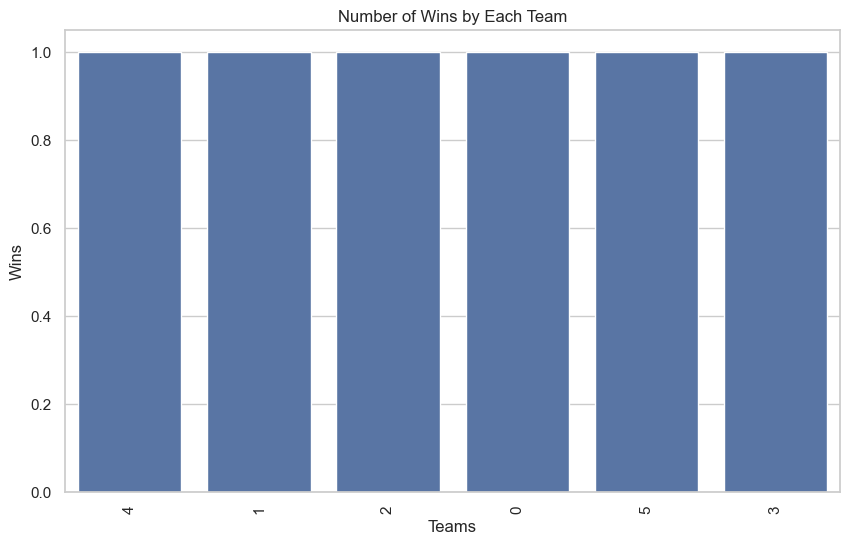

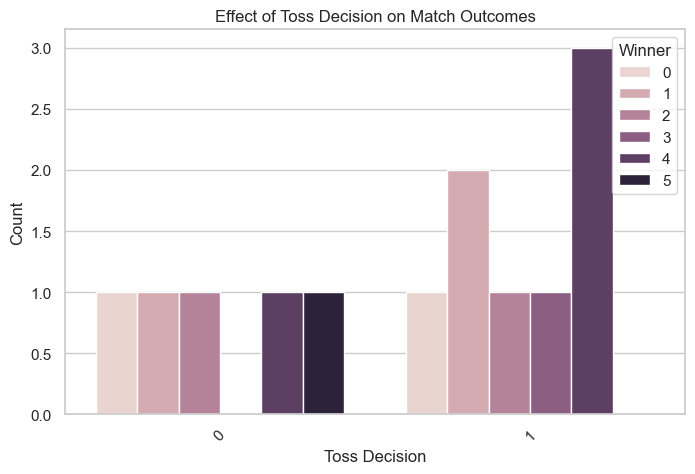

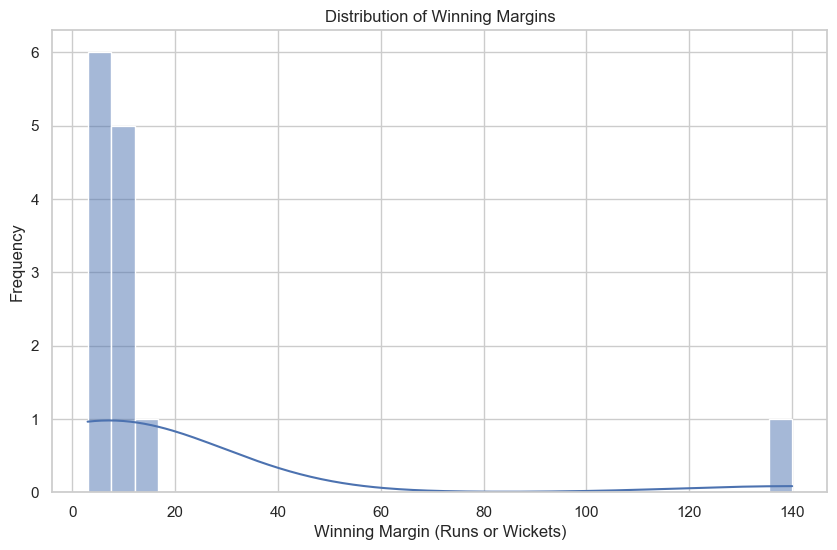

In [13]:
# Visualize the number of wins by each team
plt.figure(figsize=(10, 6))
sns.countplot(data['winner'], order=data['winner'].value_counts().index)
plt.title("Number of Wins by Each Team")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=90)
plt.show()

# Visualize the effect of toss decisions on match outcomes
plt.figure(figsize=(8, 5))
sns.countplot(x='toss_decision', hue='winner', data=data)
plt.title("Effect of Toss Decision on Match Outcomes")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Winner", loc="upper right")
plt.show()

# Visualize the distribution of winning margins
plt.figure(figsize=(10, 6))
sns.histplot(data['winning_margin'], bins=30, kde=True)
plt.title("Distribution of Winning Margins")
plt.xlabel("Winning Margin (Runs or Wickets)")
plt.ylabel("Frequency")
plt.show()



Model Evaluation:
Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



c:\VScode2024\Machinelearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\VScode2024\Machinelearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\VScode2024\Machinelearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\VScode2024\M

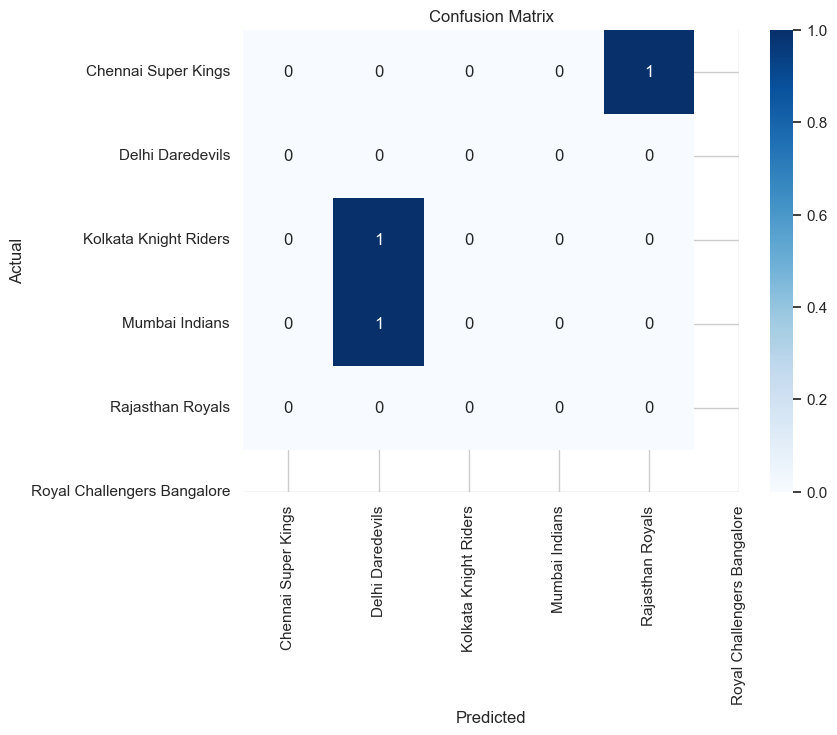

In [14]:
    #  features and target
X = data[['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'toss_match_winner', 'winning_margin']]
y = data['winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['winner'].classes_, yticklabels=label_encoders['winner'].classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


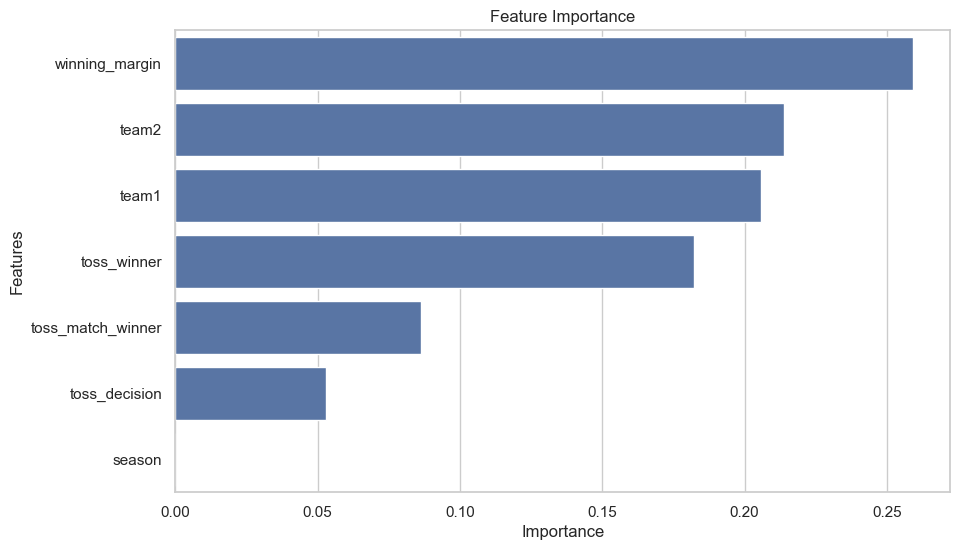

In [15]:
#  feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [16]:
# Save the cleaned dataset for future use
cleaned_file_path = "Cleaned_IPL_Cricket_Project.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to Cleaned_IPL_Cricket_Project.csv
